{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1750485600, 'main': {'temp': 16.74, 'feels_like': 16.61, 'temp_min': 16.74, 'temp_max': 18.55, 'pressure': 1019, 'sea_level': 1019, 'grnd_level': 1015, 'humidity': 82, 'temp_kf': -1.81}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'clouds': {'all': 3}, 'wind': {'speed': 2.69, 'deg': 128, 'gust': 6.05}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2025-06-21 06:00:00'}, {'dt': 1750496400, 'main': {'temp': 19.94, 'feels_like': 19.79, 'temp_min': 19.94, 'temp_max': 26.33, 'pressure': 1019, 'sea_level': 1019, 'grnd_level': 1014, 'humidity': 69, 'temp_kf': -6.39}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'clouds': {'all': 13}, 'wind': {'speed': 3.75, 'deg': 150, 'gust': 5.08}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2025-06-21 09:00:00'}, {'dt': 1750507200, 'main': {'temp': 25.91, 'feels_like': 25.71, 'temp_

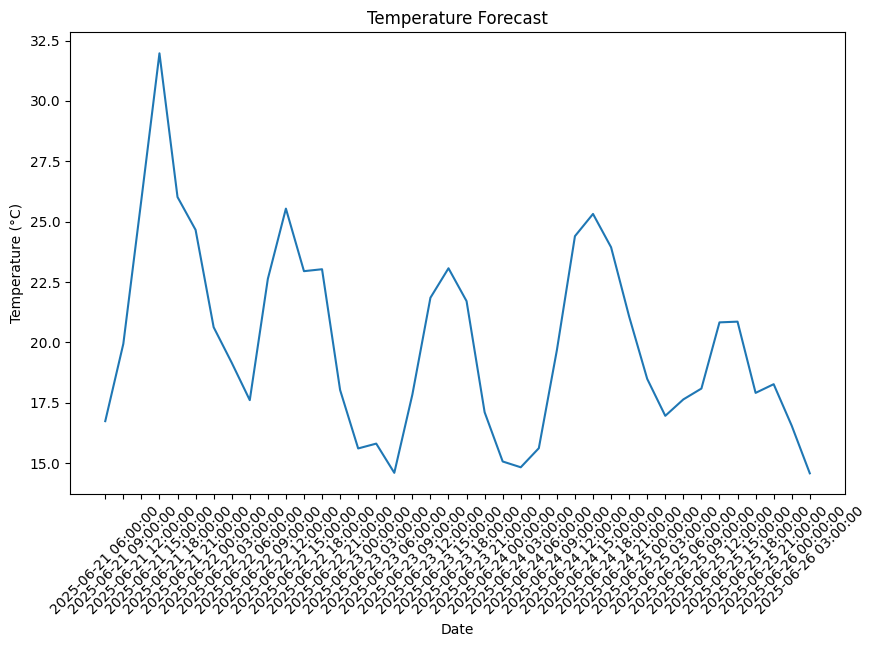

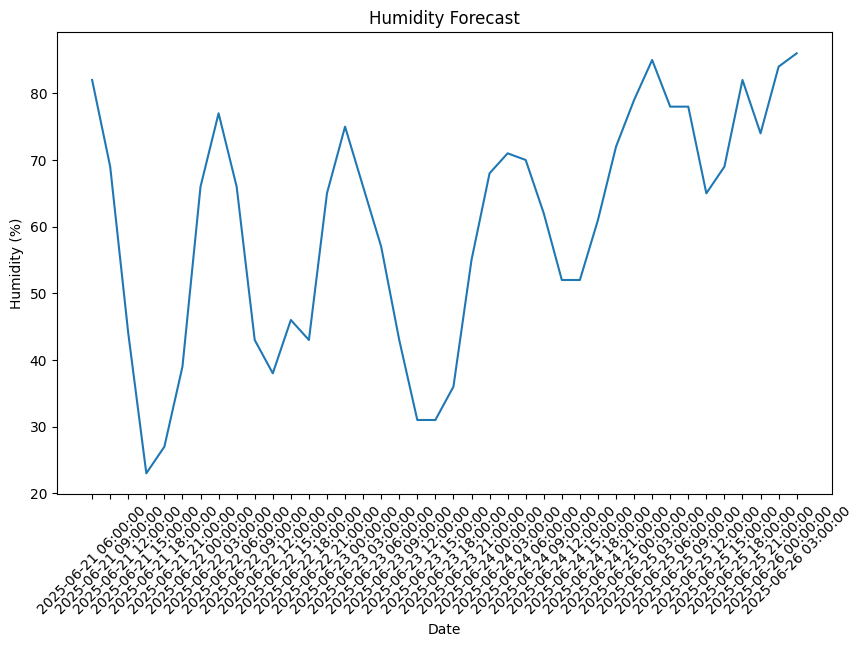

In [3]:
import os
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# OpenWeatherMap API settings
API_KEY = "f8557bd3f4a09ad21e710f7b71741933"
CITY = "London"
UNITS = "metric"

# Fetch weather data
def fetch_weather_data():
    url = f"https://api.openweathermap.org/data/2.5/forecast?q={CITY}&units={UNITS}&appid={API_KEY}"
    response = requests.get(url)
    if response.status_code != 200:
        print(f"API request failed with status code {response.status_code}")
        return None
    data = response.json()
    print(data)  # Added print statement
    return data

# Extract relevant data9
def extract_data(data):
    if data is None or 'list' not in data:
        print("Invalid API response")
        return None, None, None
    dates = []
    temps = []
    hums = []
    for forecast in data["list"]:
      dates.append(forecast["dt_txt"])
      temps.append(forecast["main"]["temp"])
      hums.append(forecast["main"]["humidity"])
    return dates, temps, hums

# Create visualizations
def create_visualizations(dates, temps, hums):
    if dates is None or temps is None or hums is None:
        return
    # Temperature plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=dates, y=temps)
    plt.title("Temperature Forecast")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.xticks(rotation=45)
    plt.show()

    # Humidity plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=dates, y=hums)
    plt.title("Humidity Forecast")
    plt.xlabel("Date")
    plt.ylabel("Humidity (%)")
    plt.xticks(rotation=45)
    plt.show()

# Main function
def main():
    data = fetch_weather_data()
    dates, temps, hums = extract_data(data)
    create_visualizations(dates, temps, hums)

if __name__ == "__main__":
    main()
